#  Exploring relationships in the data set Store with visuals
- import libraries
- import cleaned  store dataframe
- create correlation matrix heat map coloured
- create scatter plotter
- create a pair plot
- create categorical plot



# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# import cleaned data

In [2]:
#check matplotlib version
matplotlib.__version__

'3.7.0'

In [3]:
# This option ensures charts are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
# showing path
path = r'C:\Users\TEDWI\OneDrive\Project 6'

In [5]:

df_store = pd.read_pickle(os.path.join(path, 'df_store_new.pkl'))

In [6]:
df_store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
#removing column
df_store = df_store.drop(columns = ['Row ID'])


In [8]:
df_store['Order Date'] =  pd.to_datetime(df_store['Order Date'])
df_store['Ship Date'] =  pd.to_datetime(df_store['Ship Date'])

C:\Users\TEDWI\AppData\Local\Temp\ipykernel_23884\2201790845.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_store['Order Date'] =  pd.to_datetime(df_store['Order Date'])
C:\Users\TEDWI\AppData\Local\Temp\ipykernel_23884\2201790845.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_store['Ship Date'] =  pd.to_datetime(df_store['Ship Date'])


In [9]:

df_store['Order Date'] = df_store['Order Date'].apply(lambda x: dt.datetime.strftime(x, '%d-%m-%Y'))
df_store['Ship Date'] = df_store['Ship Date'].apply(lambda x: dt.datetime.strftime(x, '%d-%m-%Y'))

In [10]:
df_store['Order Date'] =  pd.to_datetime(df_store['Order Date'])
df_store['Ship Date'] =  pd.to_datetime(df_store['Ship Date'])

C:\Users\TEDWI\AppData\Local\Temp\ipykernel_23884\2201790845.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_store['Order Date'] =  pd.to_datetime(df_store['Order Date'])
C:\Users\TEDWI\AppData\Local\Temp\ipykernel_23884\2201790845.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_store['Ship Date'] =  pd.to_datetime(df_store['Ship Date'])


In [11]:
df_store['Treatment time'] = df_store['Ship Date']- df_store['Order Date']

df_store.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales,Treatment time
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3 days
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3 days
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4 days
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7 days
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7 days


In [12]:
sorted(df_store['Postal Code'].unique())

[1040.0,
 1453.0,
 1752.0,
 1810.0,
 1841.0,
 1852.0,
 1915.0,
 2038.0,
 2138.0,
 2148.0,
 2149.0,
 2151.0,
 2169.0,
 2740.0,
 2886.0,
 2895.0,
 2908.0,
 2920.0,
 3060.0,
 3301.0,
 3820.0,
 4240.0,
 4401.0,
 6010.0,
 6040.0,
 6360.0,
 6450.0,
 6457.0,
 6460.0,
 6484.0,
 6708.0,
 6810.0,
 6824.0,
 7002.0,
 7011.0,
 7017.0,
 7036.0,
 7050.0,
 7055.0,
 7060.0,
 7090.0,
 7109.0,
 7501.0,
 7601.0,
 7960.0,
 8302.0,
 8360.0,
 8401.0,
 8701.0,
 8861.0,
 8901.0,
 10009.0,
 10011.0,
 10024.0,
 10035.0,
 10550.0,
 10701.0,
 10801.0,
 11520.0,
 11550.0,
 11561.0,
 11572.0,
 11757.0,
 12180.0,
 13021.0,
 13440.0,
 13501.0,
 13601.0,
 14215.0,
 14304.0,
 14609.0,
 14701.0,
 16602.0,
 17403.0,
 17602.0,
 18018.0,
 18103.0,
 19013.0,
 19120.0,
 19134.0,
 19140.0,
 19143.0,
 19601.0,
 19711.0,
 19805.0,
 19901.0,
 20016.0,
 20707.0,
 20735.0,
 20852.0,
 20877.0,
 21044.0,
 21215.0,
 21740.0,
 22153.0,
 22204.0,
 22304.0,
 22801.0,
 22901.0,
 22980.0,
 23223.0,
 23320.0,
 23434.0,
 23464.0,
 23602.0,
 

In [13]:
df_store= df_store[df_store['Postal Code'].notna()]
df_store['Postal Code'].isna().any()


False

In [14]:
df_store['Postal Code']=df_store['Postal Code'].astype(int)

# Correlation

In [15]:
# Create a correlation matrix using pandas
df_store.corr()

C:\Users\TEDWI\AppData\Local\Temp\ipykernel_23884\4206750823.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_store.corr()


,Postal Code,Sales
Postal Code,1.000000,-0.024067
Sales,-0.024067,1.000000


#The correlation between postal code and sales is displayed since sales is determined by postal code
-0.024 coefficient shows that there is a weak negative correlation
1 correlation shows that there is a strong positive correlation

# Scatterplotter

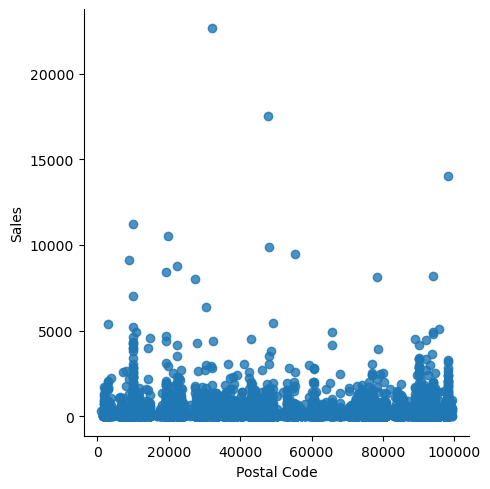

In [16]:
# I do find it interesting that rank is more closely correlated with Qualification rather than Final
# Create a scatterplot for the "Qualification" and "Rank" columns in seaborn
sns.lmplot(x = 'Postal Code', y = 'Sales', data = df_store)

 ##The Postal Code and Sales variables produce many outliers.

# Pair Plots

In [22]:
 #Keep only the variables you want to use in the pair plot

sub=df_store[['Postal Code','Treatment time', 'Sales']]

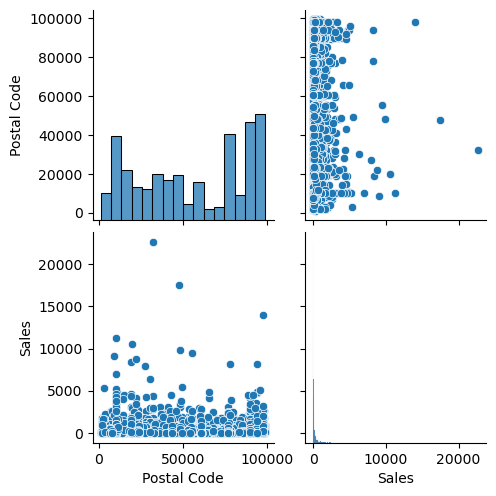

In [23]:
# Create a pair plot 

g = sns.pairplot(sub)

### The different visuals are quite interesting. The barchart gives a clearer representation.

# Categorical Plot

In [1]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution
sns.histplot(sub['Sales'], bins = 20, kde = True)

NameError: name 'sns' is not defined

In [ ]:
sub.loc[sub['Sales'] <= 100, ' Sales category'] = 'Least Profitable'

In [ ]:
sub.loc[(sub['Sales'] > 200) & (sub['Sales'] <= 300), 'Sales category'] = ' Average Profitable'

In [ ]:
sub.loc[(sub['Sales'] > 300) & (sub['Sales'] <= 400), 'Rank category'] = 'Above Average Profitable'

In [ ]:
sub.loc[sub['Sales'] > 500, 'Sales category'] = 'Very Profitable'

In [ ]:
sub['Sales category'].value_counts(dropna = False)

In [ ]:
sub.columns

In [ ]:
# Create a categorical plot in seaborn using the Sales categories created above

sns.set(style="ticks")
g = sns.catplot(x="Postal Code", y="Sales", hue="Sales category", data=sub)

In [ ]:
#It is intesting to see that all postal codes purchase items of different expenses.

# Questions
- Which postal codes and states generate the highest profit?
- Which countries are these states a part of?
- Does location affect the generation of sales?
- Does shipment time vary based on location and does it affect the size of a sale?
